"""
I am going to apply 6 Supervised machine learning models on the given dataset.The strategy is to apply default model first with no tuning of the hyperparameter and then tuned them with different hyperparameter values and then I'll plot ROC curve to select the best machine learning model.The models used are as follows: 1) Principal Component Analysis2)Logistic Regression 3)Gaussian Naive Bayes 4)Support Vector Machine 5)Random Forest Classifier 6)Decision trees 7)Simple neural network
""""

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("E:/pg/docs/BPB/data/classification/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data['class'].unique()

array(['p', 'e'], dtype=object)

"""
Thus we have two claasification. Either the mushroom is poisonous or edible
""""

In [9]:
data.shape

(8124, 23)

"""
We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data.
"""

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
data.groupby('class').size()

class
0    4208
1    3916
dtype: int64

C:\Users\prateek1.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


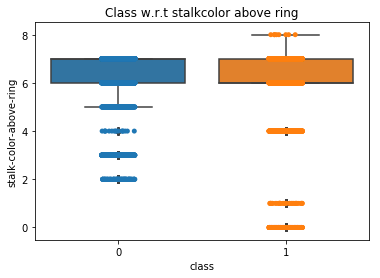

In [13]:
# Plotting boxplot to see the distribution of the data
ax = sns.boxplot(x='class', y='stalk-color-above-ring', 
                data=data)
ax = sns.stripplot(x="class", y='stalk-color-above-ring',
                   data=data, jitter=True,
                   edgecolor="gray")
plt.title("Class w.r.t stalkcolor above ring",fontsize=12)
plt.show()

In [14]:
# Separating features and label
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [16]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

"""
we have 22 features(1st one is label) and 8124 instances.Now let us check which features constitutes maximum information.
"""

In [17]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [18]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ..., 
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ -5.74321902e-01,  -9.75781349e-01,  -1.22176154e+00, ...,
         -2.08581362e-01,   8.13996758e-03,  -1.86965391e-18],
       [ -2.28210230e+00,   2.79066333e-01,  -1.20049669e+00, ...,
          1.52238789e-01,  -1.96446132e-01,   5.11387176e-18],
       [ -1.85803562e+00,  -2.70972362e-01,  -1.37237069e+00, ...,
          2.57581784e-01,  -3.62577199e-01,   2.26857503e-18],
       ..., 
       [ -1.62151632e+00,  -7.57536709e-01,   2.73357994e+00, ...,
         -1.42532241e+00,   6.36990122e-01,   8.23729756e-20],
       [  3.67060561e+00,  -1.03277450e+00,   1.68459501e-01, ...,
          9.41440123e-02,  -6.43462238e-02,  -4.67946395e-21],
       [ -1.57520272e+00,  -1.22858140e+00,   2.44722789e+00, ...,
         -8.04626064e-01,   5.90315263e-01,   8.73464948e-21]])

In [20]:
covariance=pca.get_covariance()

In [21]:
explained_variance = pca.explained_variance_
explained_variance

array([  3.87410924e+00,   2.60339434e+00,   2.40073834e+00,
         2.16674719e+00,   1.70303181e+00,   1.39495575e+00,
         9.78803667e-01,   9.51936841e-01,   7.70036405e-01,
         7.11748353e-01,   5.77556532e-01,   5.42484855e-01,
         5.09631267e-01,   4.77214086e-01,   3.84467203e-01,
         3.11228233e-01,   2.18649656e-01,   1.59514884e-01,
         1.31521687e-01,   7.31993474e-02,   6.16155691e-02,
         1.09026115e-35])

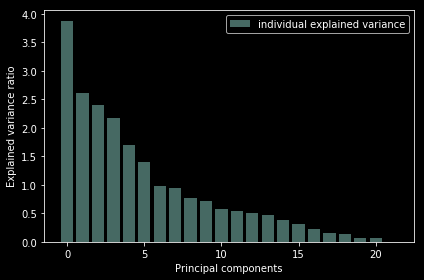

In [22]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

"""
We can see that the last 4 components has less amount of variance of the data.The 1st 17 components retains more than 90% of the data.
"""

"""
Let us take only first two principal components and visualise it using K-means clustering
"""

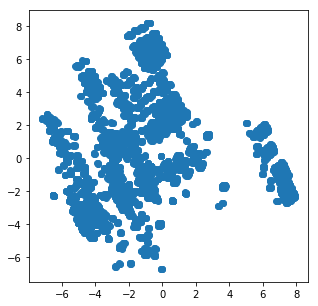

In [23]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

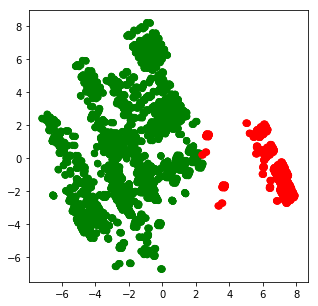

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

"""
Thus using K-means we are able segregate 2 classes well using the first two components with maximum variance
"""

In [26]:
# Performing PCA by taking 17 components with maximum Variance
pca_modified=PCA(n_components=17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ..., 
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

"""
Default Logistic Regression
"""

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [29]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [32]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95793885601577911

In [33]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

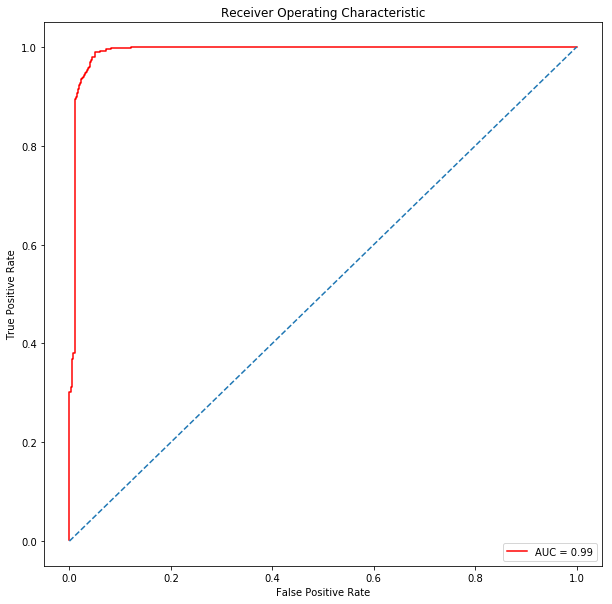

In [34]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Logistic Regression(Tuned model)
"""

"""
L1 and L2 are regularization parameters.
They're used to avoid overfiting.
Both L1 and L2 regularization prevents overfitting by shrinking (imposing a penalty) on the coefficients.
L1 is the first moment norm |x1-x2| (|w| for regularization case) that is simply the absolute dıstance between two points where L2 is second moment norm corresponding to Eucledian Distance that is |x1-x2|^2 (|w|^2 for regularization case).
In simple words,L2 (Ridge) shrinks all the coefficient by the same proportions but eliminates none, while L1 (Lasso) can shrink some coefficients to zero, performing variable selection. If all the features are correlated with the label, ridge outperforms lasso, as the coefficients are never zero in ridge. If only a subset of features are correlated with the label, lasso outperforms ridge as in lasso model some coefficient can be shrunken to zero.
"""

In [37]:
LR_model = LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] , 
                    'penalty':['l1','l2']
                   }

"""
The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.
"""

In [38]:
from sklearn.model_selection import GridSearchCV
LR = GridSearchCV(LR_model, tuned_parameters,cv=10)

LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
LR.best_params_

{'C': 100, 'penalty': 'l1'}

In [40]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [41]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]], dtype=int64)

In [42]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.97      0.98      0.97       845\n          1       0.97      0.97      0.97       780\n\navg / total       0.97      0.97      0.97      1625\n'

In [43]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9728303747534518

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99163101198604164

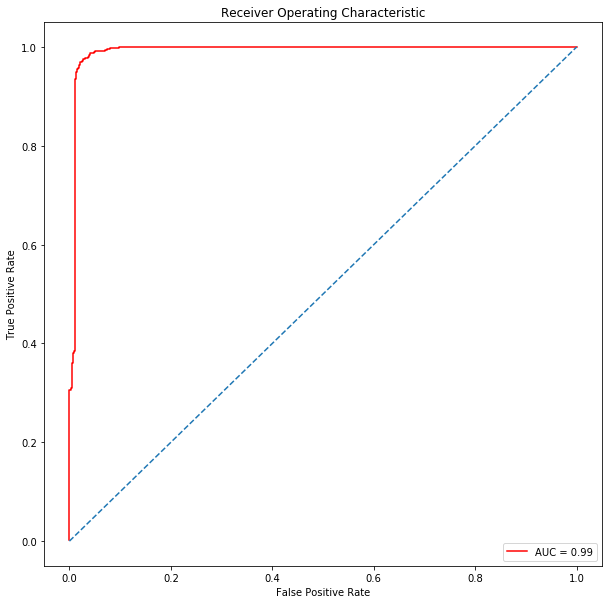

In [45]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)

1.0

In [48]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]], dtype=int64)

In [49]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.96      0.96      0.96       845\n          1       0.96      0.95      0.96       780\n\navg / total       0.96      0.96      0.96      1625\n'

In [50]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95793885601577911

In [51]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

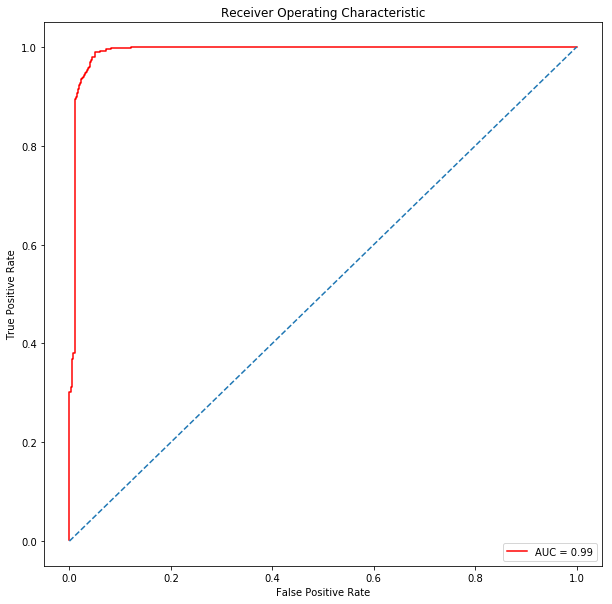

In [52]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Gaussian Naive Bayes
"""

In [53]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [54]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [55]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 1625 points : 111


In [56]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
scores

array([ 0.59778598,  0.78843788,  0.97908979,  0.9803198 ,  0.84870849,
        0.81303813,  0.81034483,  0.81650246,  0.85326757,  0.97533909])

In [57]:
scores.mean()

0.84628340228874954

In [58]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[786,  59],
       [ 52, 728]], dtype=int64)

In [59]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.94      0.93      0.93       845\n          1       0.93      0.93      0.93       780\n\navg / total       0.93      0.93      0.93      1625\n'

In [60]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9317554240631164

In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9592201486876043

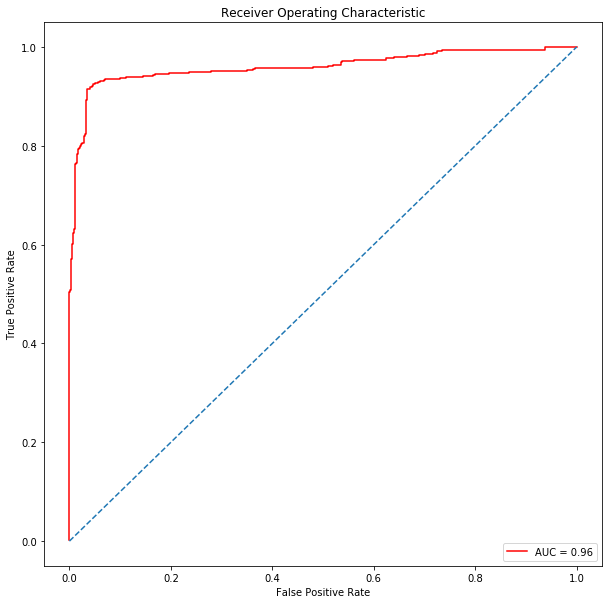

In [62]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Support Vector Machine
"""

In [63]:
from sklearn.svm import SVC
svm_model = SVC()

"""
The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.
"""

In [64]:
# Support Vector Machine without polynomial kernel
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
    }

"""
The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter**.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained. But it is proving computationally expensive here.So I am opting for RandomizedSearchCV.

RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search: 1)A budget can be chosen independent of the number of parameters and possible values. 2)Adding parameters that do not influence the performance does not decrease efficiency.
"""

In [66]:
from sklearn.model_selection import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [67]:
model_svm.fit(X_train, y_train)
model_svm.best_score_

1.0

In [68]:
model_svm.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
y_pred= model_svm.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

1.0

In [70]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [71]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [72]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [73]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

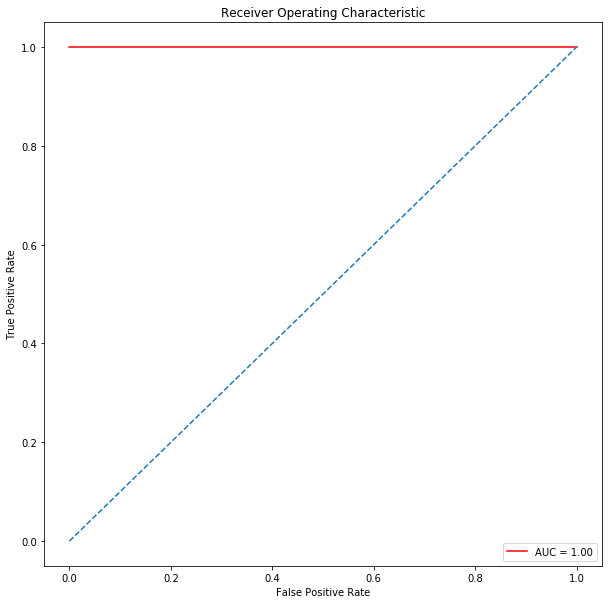

In [74]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
# Support Vector machine with polynomial Kernel
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [76]:
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [77]:
model_svm.fit(X_train, y_train)
model_svm.best_score_

1.0

In [78]:
model_svm.grid_scores_

C:\Users\prateek1.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 1, 'degree': 6, 'C': 10},
 mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 0.1, 'degree': 6, 'C': 500},
 mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.0001, 'degree': 6, 'C': 100},
 mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.0001, 'degree': 3, 'C': 1000},
 mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.0001, 'degree': 2, 'C': 1},
 mean: 0.92814, std: 0.01278, params: {'kernel': 'poly', 'gamma': 0.001, 'degree': 3, 'C': 1000},
 mean: 1.00000, std: 0.00000, params: {'kernel': 'poly', 'gamma': 1, 'degree': 6, 'C': 1000},
 mean: 0.51977, std: 0.00204, params: {'kernel': 'poly', 'gamma': 0.01, 'degree': 6, 'C': 1},
 mean: 0.94599, std: 0.00870, params: {'kernel': 'poly', 'gamma': 0.01, 'degree': 6, 'C': 1000},
 mean: 0.51746, std: 0.00036, params: {'kernel': 'poly', 'gamma': 0.001, 'degree': 4, 'C': 1},
 mean: 0.51746, std: 0.00036, params: {'ke

In [79]:
model_svm.best_params_

{'C': 10, 'degree': 6, 'gamma': 1, 'kernel': 'poly'}

In [80]:
y_pred= model_svm.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

1.0

In [81]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [82]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [83]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [84]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

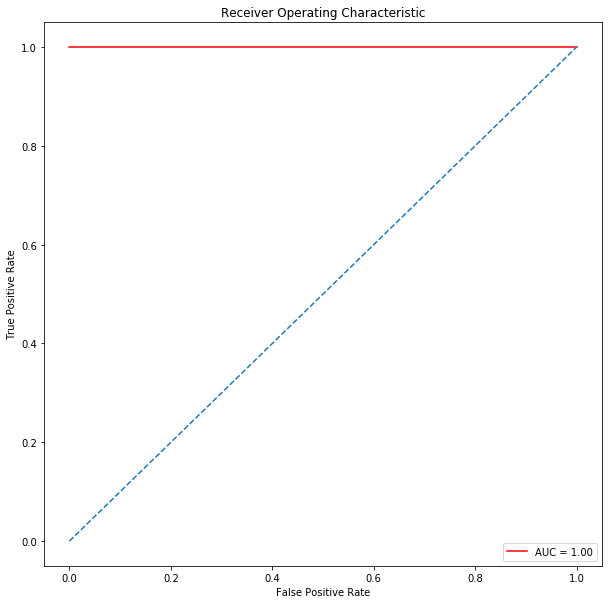

In [85]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Default Random Forest Classifier
"""

In [86]:
from sklearn.ensemble import RandomForestClassifier

model_RR = RandomForestClassifier()

In [87]:
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [89]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [90]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [91]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [92]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

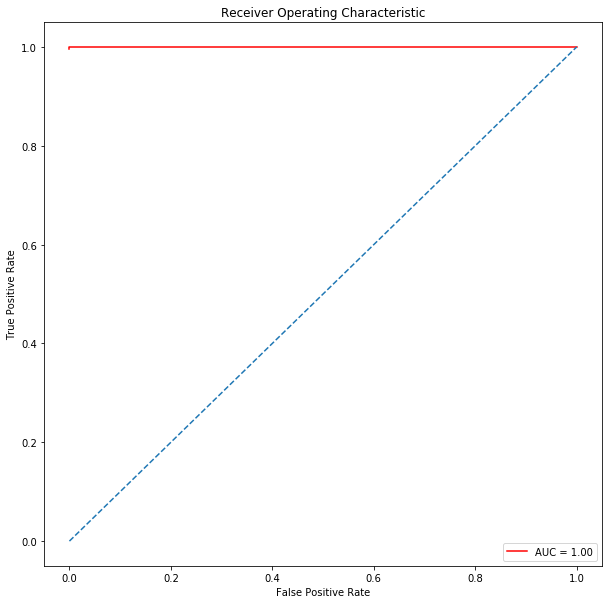

In [93]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Thus default Random forest model is giving us best accuracy.
Let us tuned the parameters of Random Forest just for the purpose of knowledge
There are 3 features which can be tuned to improve the performance of Random Forest

1) max_features 2) n_estimators 3) min_sample_leaf
"""

"""
A)max_features: These are the maximum number of features Random Forest is allowed to try in individual tree. 
1)Auto : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree. 
2)sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree. 
3)log2:It is another option which takes log to the base 2 of the features input.

Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

B) n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

C)min_sample_leaf: Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.
"""

In [94]:
model_RR = RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

"""
n_jobs
This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.
"""

In [100]:
RR_model = RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,return_train_score=True)

In [101]:
RR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [102]:
RR_model.cv_results_

{'mean_fit_time': array([ 0.29341006,  0.08068459,  0.1897918 ,  0.28643274,  0.1794193 ,
         0.07479944,  0.27955606,  0.07430713,  0.17862227,  0.31196833,
         0.03859708,  0.15099609,  0.04178803,  0.21183338,  0.30857379,
         0.03799851,  0.21103499,  0.25088215,  0.07150812,  0.18538613]),
 'mean_score_time': array([ 0.01107039,  0.00359001,  0.00877604,  0.01166856,  0.00708127,
         0.00398901,  0.01176851,  0.00368974,  0.00708079,  0.01446147,
         0.0020946 ,  0.0065824 ,  0.00199418,  0.00857661,  0.01416187,
         0.00229354,  0.00887592,  0.01097043,  0.00359068,  0.0068814 ]),
 'mean_test_score': array([ 0.98584398,  0.98999846,  0.98338206,  0.99815356,  0.99815356,
         0.98199723,  0.98261271,  0.99861517,  0.98168949,  0.98168949,
         0.98107401,  0.99876904,  0.98630559,  0.98692106,  0.9836898 ,
         0.97338052,  0.98999846,  0.99953839,  0.97784275,  0.98168949]),
 'mean_train_score': array([ 0.98608339,  0.98924617,  0.984048

In [103]:
RR_model.best_score_

0.99953839052161875

In [104]:
RR_model.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 70}

In [105]:
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

1.0

In [106]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [107]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [108]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [109]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

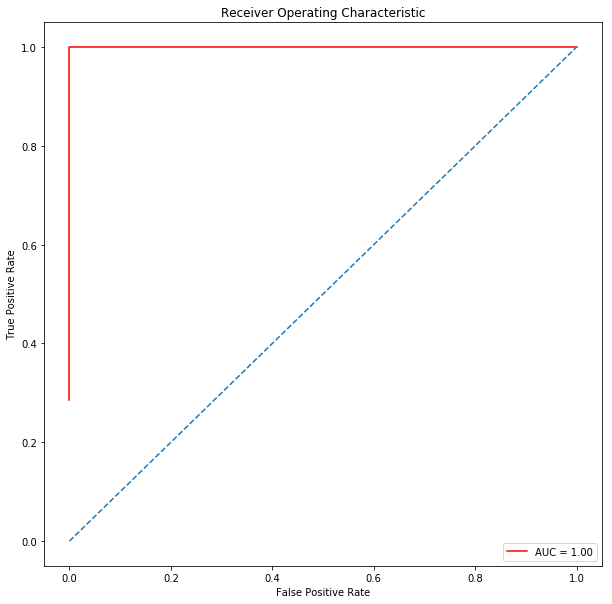

In [110]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
DecisionTreeClassifier
"""

In [111]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [112]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [114]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [115]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [116]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [117]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

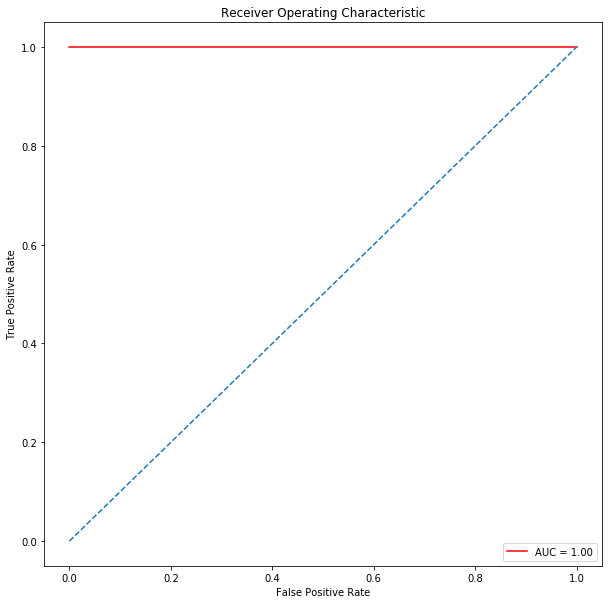

In [118]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Let us tune the hyperparameters of the Decision tree model
1)Criterion: Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes. The details of Gini and entropy needs detail explanation.

2)max_depth(Maximum depth of tree (vertical depth)): Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

max_features and min_samples_leaf is same as Random Forest classifier
"""

In [119]:
model_DD = DecisionTreeClassifier()
tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }

In [123]:
DD_model= RandomizedSearchCV(model_DD, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5,return_train_score=True)

In [124]:
DD_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': range(1, 100), 'max_depth': range(1, 50)},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [125]:
DD_model.cv_results_

{'mean_fit_time': array([ 0.0065824 ,  0.00688136,  0.00747969,  0.00648215,  0.00658092,
         0.00628328,  0.00598383,  0.00678194,  0.00578468,  0.00668218,
         0.0070816 ,  0.00678232,  0.0064826 ,  0.00608406,  0.0068809 ,
         0.00578394,  0.00588436,  0.00528374,  0.00369   ,  0.00359056]),
 'mean_score_time': array([ 0.00069826,  0.00079746,  0.00089755,  0.00069838,  0.00039933,
         0.00069828,  0.00179551,  0.00079834,  0.00059834,  0.00079796,
         0.00079739,  0.00069799,  0.00089772,  0.00069818,  0.0004986 ,
         0.00079796,  0.00069771,  0.00039935,  0.00029914,  0.00049849]),
 'mean_test_score': array([ 0.97830435,  0.98769041,  0.95814741,  0.96830282,  0.96291737,
         0.99446069,  0.96014772,  0.96799508,  0.9367595 ,  0.92937375,
         0.96491768,  0.99261425,  0.95937837,  0.97861209,  0.97261117,
         0.95999385,  0.96553316,  0.96691799,  0.99430682,  0.98338206]),
 'mean_train_score': array([ 0.97907408,  0.9885622 ,  0.962644

In [126]:
DD_model.best_score_

0.99446068625942452

In [127]:
DD_model.best_params_

{'criterion': 'entropy',
 'max_depth': 31,
 'max_features': 'log2',
 'min_samples_leaf': 10}

In [128]:
y_prob = DD_model.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
DD_model.score(X_test, y_pred)

1.0

In [129]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [130]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [131]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [132]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

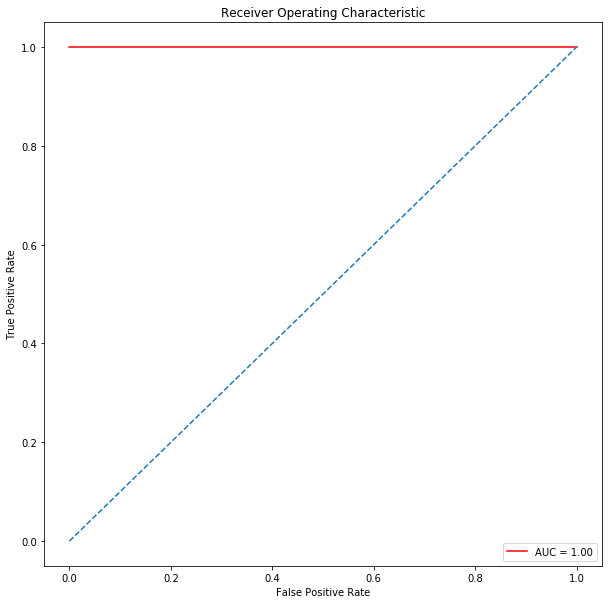

In [133]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Applying default Neural Network model
"""

In [134]:
from sklearn.neural_network import MLPClassifier

In [135]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [136]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [137]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [138]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [139]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [140]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

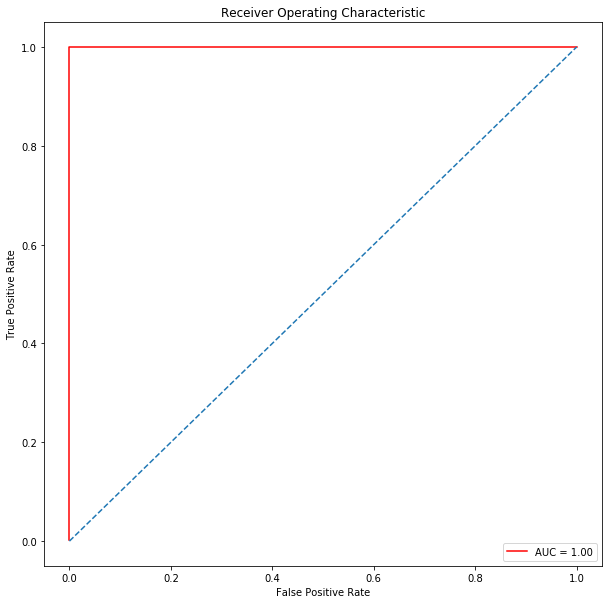

In [141]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

"""
Tuning the hyperparameters of the neural network
"""

"""
1) hidden_layer_sizes : Number of hidden layers in the network.(default is 100).Large number may overfit the data.

2) activation: Activation function for the hidden layer. A)‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)). B)‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x). C)‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

3) alpha: L2 penalty (regularization term) parameter.(default 0.0001)

4) max_iter: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.(default 200)
"""

In [142]:
mlp = MLPClassifier()

tuned_parameters={'hidden_layer_sizes': range(1,200,10) , 'activation': ['tanh','logistic','relu'],
                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 'max_iter': range(50,200,50)}

In [144]:
model_mlp = RandomizedSearchCV(mlp, tuned_parameters,cv=10,scoring='accuracy',n_iter=5,n_jobs= -1,random_state=5,return_train_score=True)

In [145]:
model_mlp.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'hidden_layer_sizes': range(1, 200, 10), 'activation': ['tanh', 'logistic', 'relu'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'max_iter': range(50, 200, 50)},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [146]:
model_mlp.best_score_

1.0

In [147]:
model_mlp.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 91, 'max_iter': 50}

In [148]:
y_prob = model_mlp.predict_proba(X_test)[:,1] # This will give us positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_mlp.score(X_test, y_pred)

1.0

In [149]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [151]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       845\n          1       1.00      1.00      1.00       780\n\navg / total       1.00      1.00      1.00      1625\n'

In [152]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [153]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

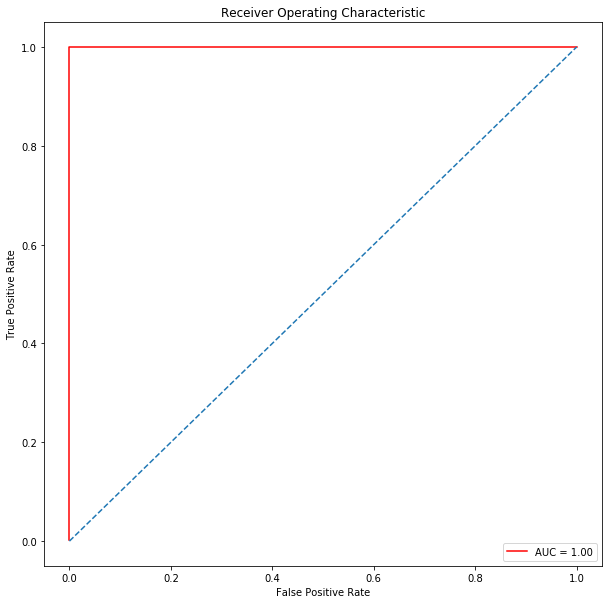

In [154]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()